In [1]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.datasets

# Repository imports
from FFBrainNet import FFBrainNet
from FFLocalNet import FFLocalNet
from LocalNetBase import Options, UpdateScheme
from DataGenerator import random_halfspace_data
from train import *

## Train an FFBrainNet using regular gradient descent on all parameters:

In [2]:
# Generate some test data
N = 1000
X,y = random_halfspace_data(dim=4, n=2*N)
X_test = X[:N]
y_test = y[:N]
X_train = X[N:]
y_train = y[N:]

In [3]:
# Build a multi-layer, randomly connected, and capped feed-forward net
brain = FFBrainNet(n=4, m=2, l=4, w=20, p=0.5, cap=5, full_gd=True)

In [4]:
# Train the net using regular gradient descent on the params
losses = train_vanilla(X_train, y_train, brain, epochs=10, batch=100, lr=0.1)

INITIAL ACCURACY
Acc of class 0 :0.7010
Acc of class 1 :0.3116
epoch 0 Accuracy: 0.5160
Evaluating
Acc of class 0 :0.8933
Acc of class 1 :0.6379
epoch  1 Loss: 0.6600 Accuracy: 0.7720
Evaluating
Acc of class 0 :0.8400
Acc of class 1 :0.8358
epoch  2 Loss: 0.5341 Accuracy: 0.8380
Evaluating
Acc of class 0 :0.9086
Acc of class 1 :0.9053
epoch  3 Loss: 0.4499 Accuracy: 0.9070
Evaluating
Acc of class 0 :0.9352
Acc of class 1 :0.9242
epoch  4 Loss: 0.4135 Accuracy: 0.9300
Evaluating
Acc of class 0 :0.9371
Acc of class 1 :0.9347
epoch  5 Loss: 0.3879 Accuracy: 0.9360
Evaluating
Acc of class 0 :0.9505
Acc of class 1 :0.9158
epoch  6 Loss: 0.3868 Accuracy: 0.9340
Evaluating
Acc of class 0 :0.9467
Acc of class 1 :0.9242
epoch  7 Loss: 0.3853 Accuracy: 0.9360
Evaluating
Acc of class 0 :0.9410
Acc of class 1 :0.9432
epoch  8 Loss: 0.3760 Accuracy: 0.9420
Evaluating
Acc of class 0 :0.9486
Acc of class 1 :0.9495
epoch  9 Loss: 0.3705 Accuracy: 0.9490
Evaluating
Acc of class 0 :0.9352
Acc of class 1

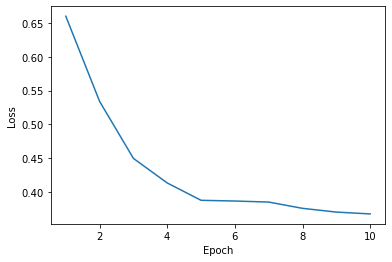

Last outer epoch loss: 0.36779028119818413


In [5]:
# Plot the learning curve
plt.plot(range(1, len(losses)+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
print('Last outer epoch loss:', losses[-1])

In [6]:
# Evaluate on test data
acc, pred_y = evaluate(X_test, y_test, 2, brain)
print('Test Accuracy:', acc)

Acc of class 0 :0.9259
Acc of class 1 :0.9377
Test Accuracy: 0.932


---
## Meta-Learn Plasticity Rules on halfspace data:

In [7]:
# Generate data
dimension = 4
n = 1000
X, y = random_halfspace_data(dim = dimension, n = 2*n)
X_test = X[:n]
y_test = y[:n]
X = X[n:]
y = y[n:]

In [8]:
# Set options to meta-learn hidden layer plasticity rules, while using regular GD on input and output weights directly
opts = Options(use_graph_rule=True,
               gd_graph_rule=True,
               gd_input=True,
               gd_output=True)
scheme = UpdateScheme()

In [9]:
# Instantiate an FFLocalNet with 2 hidden layers, widths [4, 100, 100, 2]
brain = FFLocalNet(n=4, m=2, l=2, w=100, p=0.5, cap=50, options=opts, update_scheme=scheme)

# Print initial rule
print('brain hidden_layer_rule:')
print(brain.get_hidden_layer_rule())  # 2 x (cap+1) x 2, randomly initialized

brain hidden_layer_rule:
tensor([[[ 3.1166e-01,  1.2365e+00, -6.1356e-01, -5.9399e-02, -5.5788e-01,
          -8.9585e-01,  4.7303e-01,  8.9559e-01,  9.0082e-01,  6.5442e-02,
           6.5001e-02, -4.3661e-01,  9.2498e-01,  8.3473e-01, -1.0267e+00,
           1.0027e+00,  1.0043e+00, -3.7169e-01, -1.5390e+00,  4.0364e-01,
          -6.5028e-01,  3.2282e-02,  6.6224e-01,  1.4650e-01,  7.4701e-01,
           7.0164e-01, -1.3462e+00, -1.0364e+00, -1.5156e+00,  9.5608e-01,
           9.4156e-01,  6.1348e-01, -5.3089e-01, -6.3893e-01, -1.7164e+00,
          -1.0749e+00,  4.8853e-01, -4.0178e-01, -1.8985e+00, -3.1726e-01,
           7.5944e-01,  3.5393e-01, -6.6745e-01,  1.6573e+00, -8.1844e-01,
           1.0579e-01, -1.5584e+00,  1.0925e+00,  1.0400e+00, -7.8840e-01,
           1.4187e+00],
         [-4.7481e-01,  1.0596e+00,  1.8517e-01, -1.0635e-01, -6.4449e-01,
          -3.5299e-01,  1.0069e-01,  5.3208e-01, -4.8599e-01,  1.0435e+00,
          -1.6118e-01,  8.1501e-01,  4.3815e-02, -2

Starting Train
Outer epoch  1
Acc of class 0 :0.0243
Acc of class 1 :0.8126
Train Accuracy: 0.4240
Acc of class 0 :0.0334
Acc of class 1 :0.8065
Test Accuracy: 0.4130
Current loss: 0.8466694388800345
Mean loss so far: 0.8466694388800345
Outer epoch  2
Acc of class 0 :0.1542
Acc of class 1 :0.9270
Train Accuracy: 0.5460
Acc of class 0 :0.1297
Acc of class 1 :0.9593
Test Accuracy: 0.5370
Current loss: 0.7815386407351129
Mean loss so far: 0.8141040398075737
Outer epoch  3
Acc of class 0 :0.0000
Acc of class 1 :1.0000
Train Accuracy: 0.5070
Acc of class 0 :0.0000
Acc of class 1 :1.0000
Test Accuracy: 0.4910
Current loss: 0.7820080813945303
Mean loss so far: 0.803405387003226
Outer epoch  4
Acc of class 0 :0.0000
Acc of class 1 :1.0000
Train Accuracy: 0.5070
Acc of class 0 :0.0000
Acc of class 1 :1.0000
Test Accuracy: 0.4910
Current loss: 0.793579730545136
Mean loss so far: 0.8009489728887034
Outer epoch  5
Acc of class 0 :0.1339
Acc of class 1 :0.8442
Train Accuracy: 0.4940
Acc of class 0 

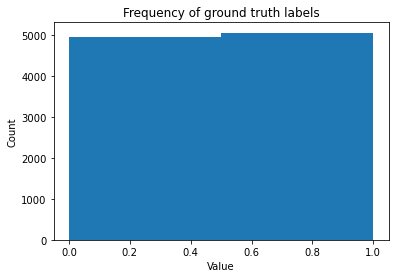

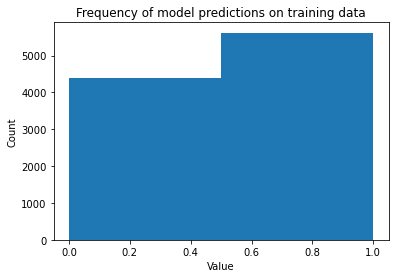

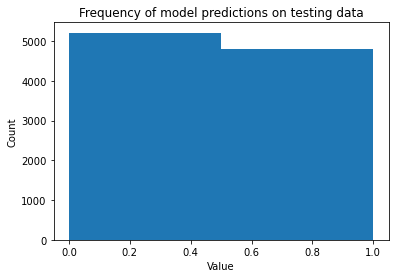

In [10]:
# Meta-Learn a single plasticity rule between the two hidden layers
losses, train_accuracies, test_accuracies, other_stats = train_local_rule(
    X,                      # Training Examples
    y,                      # Training Labels
    brain,                  # The FFBrainNet
    rule_epochs = 100,      # Number of times to run through the data
    epochs = 1,             # Number of time to run through a single batch for a single training pass
    batch = 100,            # Number of examples in a batch.
    lr = 1e-2,              # Learning Rate
    X_test = X_test,
    y_test = y_test,
    verbose = True)         # Evaluate network on test/train data each epoch

(array([4379., 5621.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

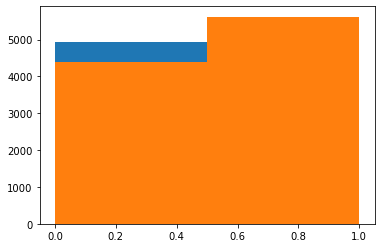

In [11]:
all_true_y, all_pred_y = other_stats[:2]
all_true_y = np.array(all_true_y, dtype=np.int32)
all_pred_y = np.array(all_pred_y, dtype=np.int32)
plt.hist(all_true_y, bins=2)
plt.hist(all_pred_y, bins=2)

In [12]:
# Show updated hidden layer rule
print('brain hidden_layer_rule:')
print(brain.get_hidden_layer_rule())

brain hidden_layer_rule:
tensor([[[-9.1893e-25,  3.2725e-18,  4.6465e-23,  2.4117e-26, -2.8124e-23,
           1.7540e-21, -1.5167e-23, -1.7180e-21, -2.3151e-21, -9.9942e-25,
           6.7237e-25, -2.2264e-15,  2.2148e-15, -7.9677e-12,  6.0833e-10,
          -2.9192e-10,  1.5929e-09, -1.7010e-08, -1.3798e-07, -3.1484e-07,
           1.8274e-04,  7.2426e-04,  2.7601e-04,  1.0989e-03,  2.8951e-03,
           2.8881e-03, -4.2345e-06,  6.4682e-05,  8.5804e-06,  7.9621e-07,
           9.0451e-06, -1.5820e-07, -3.3386e-08, -1.2211e-08, -7.7826e-09,
           6.2881e-12,  2.7245e-14,  1.0113e-19, -1.1714e-08,  5.4891e-24,
          -9.7232e-23, -4.0801e-24,  7.1979e-23, -6.2436e-13,  7.8884e-23,
          -6.7891e-25,  4.2218e-14,  1.0464e-20,  1.2879e-20, -1.0586e-22,
          -1.1710e-15],
         [ 1.1239e-23, -4.8560e-20, -3.4425e-24, -1.2853e-24, -5.0934e-23,
           6.2556e-24,  1.7489e-24, -1.8556e-23, -1.8819e-23,  4.1636e-21,
          -2.3683e-07,  5.0677e-04,  3.0666e-03,  4

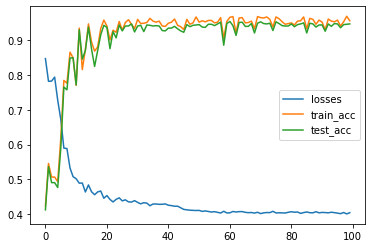

Last outer epoch loss: 0.4049186260114202
Last outer epoch train_accuracies: [0.955]
Last outer epoch test_accuracies: [0.946]


In [13]:
# Plot learning curves
plt.plot(losses, label='losses')
plt.plot(np.reshape(train_accuracies, -1), label='train_acc')
plt.plot(np.reshape(test_accuracies, -1), label='test_acc')
plt.legend()
plt.show()
print('Last outer epoch loss:', losses[-1])
print('Last outer epoch train_accuracies:', train_accuracies[-1])
print('Last outer epoch test_accuracies:', test_accuracies[-1])

---
## Train with the already learned rules on a different halfspace:

In [14]:
# Generate data.
dimension = 4
n = 5000
X, y = random_halfspace_data(dim = dimension, n = 3*n)
X_test = X[:n]
y_test = y[:n]
X = X[n:]
y = y[n:]

Train on 0  examples.
Acc of class 0 :0.0000
Acc of class 1 :1.0000
Train Accuracy: 0.5054
Acc of class 0 :0.0000
Acc of class 1 :1.0000
Test Accuracy: 0.4992
Train on 500  examples.
Acc of class 0 :0.6440
Acc of class 1 :0.0801
Train Accuracy: 0.3590
Acc of class 0 :0.6494
Acc of class 1 :0.0729
Test Accuracy: 0.3616
Train on 1000  examples.
Acc of class 0 :0.6834
Acc of class 1 :0.0665
Train Accuracy: 0.3716
Acc of class 0 :0.6789
Acc of class 1 :0.0633
Test Accuracy: 0.3716
Train on 1500  examples.
Acc of class 0 :0.7024
Acc of class 1 :0.0617
Train Accuracy: 0.3786
Acc of class 0 :0.6981
Acc of class 1 :0.0553
Test Accuracy: 0.3772
Train on 2000  examples.
Acc of class 0 :0.7149
Acc of class 1 :0.0582
Train Accuracy: 0.3830
Acc of class 0 :0.7109
Acc of class 1 :0.0505
Test Accuracy: 0.3812
Train on 2500  examples.
Acc of class 0 :0.7236
Acc of class 1 :0.0566
Train Accuracy: 0.3865
Acc of class 0 :0.7200
Acc of class 1 :0.0489
Test Accuracy: 0.3850
Train on 3000  examples.
Acc of 

ValueError: too many values to unpack (expected 2)

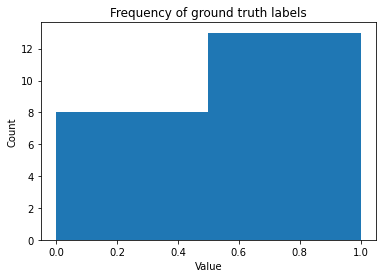

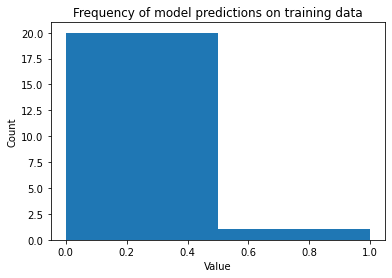

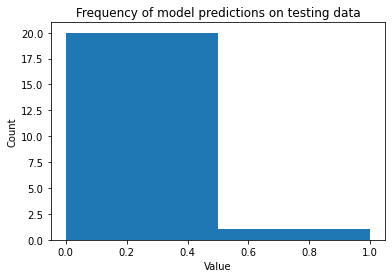

In [15]:
# NOTE: This method trains only once over all examples, updating the stats every 500 steps.
train_accuracies, test_accuracies, other_stats = train_given_rule(
    X,                      # Training Examples
    y,                      # Training Labels
    brain,                  # The FFBrainNet
    X_test = X_test,
    y_test = y_test,
    verbose = True)         # Evaluate the network every 500 samples

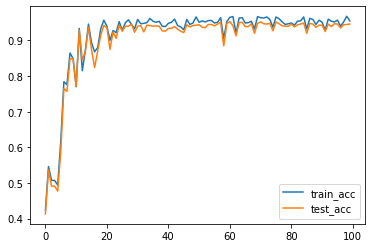

In [16]:
# Plot learning curves
plt.plot(np.reshape(train_accuracies, -1), label='train_acc')
plt.plot(np.reshape(test_accuracies, -1), label='test_acc')
plt.legend()
plt.show()

---

## Validate Output Layer meta-learning by recreating Figure 2

In [2]:
# Bring in MNIST
mnist_train = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_test = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=None)

X_train = np.array([np.array(pair[0]).flatten() for pair in mnist_train]) / 255.0
y_train = np.array([pair[1] for pair in mnist_train])
X_test = np.array([np.array(pair[0]).flatten() for pair in mnist_test]) / 255.0
y_test = np.array([pair[1] for pair in mnist_test])

Train with full GD on MNIST with one hidden layer, w=1000 \
This should be similar to the benchmark GD case for Figure 2 (GD-Trained w/ batch=200)

In [3]:
brain = FFBrainNet(n=784, m=10, l=1, w=1000, p=0.1, cap=100, full_gd=True)
losses, gd_samples, gd_accuracies = train_vanilla(X_train, y_train, brain, epochs=2, batch=200, lr=1e-3)

INITIAL ACCURACY
Acc of class 0 :0.0098
Acc of class 1 :0.0053
Acc of class 2 :0.0317
Acc of class 3 :0.1187
Acc of class 4 :0.1018
Acc of class 5 :0.0719
Acc of class 6 :0.1038
Acc of class 7 :0.0607
Acc of class 8 :0.4956
Acc of class 9 :0.0466
epoch 0 Accuracy: 0.1028
Acc of class 0 :0.0122
Acc of class 1 :0.0271
Acc of class 2 :0.0262
Acc of class 3 :0.1954
Acc of class 4 :0.1652
Acc of class 5 :0.0965
Acc of class 6 :0.1242
Acc of class 7 :0.0841
Acc of class 8 :0.5594
Acc of class 9 :0.1232
Acc of class 0 :0.0130
Acc of class 1 :0.0780
Acc of class 2 :0.0198
Acc of class 3 :0.3593
Acc of class 4 :0.2516
Acc of class 5 :0.0968
Acc of class 6 :0.1639
Acc of class 7 :0.1239
Acc of class 8 :0.5623
Acc of class 9 :0.2150
Acc of class 0 :0.0160
Acc of class 1 :0.2087
Acc of class 2 :0.0181
Acc of class 3 :0.4714
Acc of class 4 :0.3365
Acc of class 5 :0.1068
Acc of class 6 :0.2146
Acc of class 7 :0.1662
Acc of class 8 :0.5943
Acc of class 9 :0.2927
Acc of class 0 :0.0196
Acc of class 1 

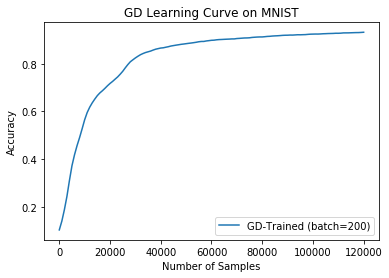

In [4]:
plt.plot(gd_samples, gd_accuracies, label='GD-Trained (batch=200)')
plt.title('GD Learning Curve on MNIST')
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Now compare this to learning via an output plasticity rule. \
We'll first meta-learn an output rule using MNIST:

Starting Train
Outer epoch  1
Acc of class 0 :0.8563
Acc of class 1 :0.9242
Acc of class 2 :0.5117
Acc of class 3 :0.6513
Acc of class 4 :0.7104
Acc of class 5 :0.2079
Acc of class 6 :0.5436
Acc of class 7 :0.6833
Acc of class 8 :0.7161
Acc of class 9 :0.3071
Train Accuracy: 0.6190
Acc of class 0 :0.8510
Acc of class 1 :0.9304
Acc of class 2 :0.5136
Acc of class 3 :0.7010
Acc of class 4 :0.7312
Acc of class 5 :0.2209
Acc of class 6 :0.5699
Acc of class 7 :0.6868
Acc of class 8 :0.7464
Acc of class 9 :0.2904
Test Accuracy: 0.6315
Current loss: 1.7788690696294878
Mean loss so far: 1.7788690696294878
Outer epoch  2
Acc of class 0 :0.7950
Acc of class 1 :0.9232
Acc of class 2 :0.2993
Acc of class 3 :0.8708
Acc of class 4 :0.7294
Acc of class 5 :0.2147
Acc of class 6 :0.8714
Acc of class 7 :0.7481
Acc of class 8 :0.3005
Acc of class 9 :0.6919
Train Accuracy: 0.6533
Acc of class 0 :0.7908
Acc of class 1 :0.9295
Acc of class 2 :0.2742
Acc of class 3 :0.8842
Acc of class 4 :0.7230
Acc of class

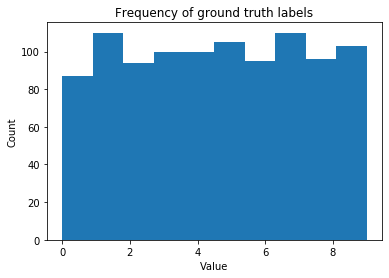

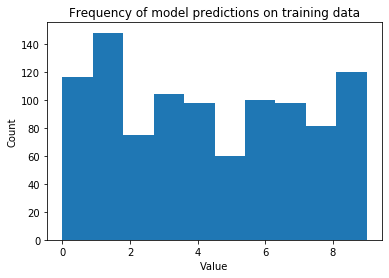

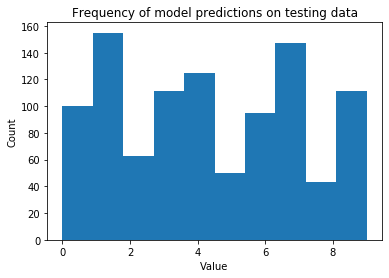

In [5]:
# Learn an output layer plasticity rule
opts = Options(use_output_rule=True, gd_output_rule=True, gd_input=True)
scheme = UpdateScheme(update_misclassified=False, update_all_edges=True)
local_brain = FFLocalNet(n=784, m=10, l=1, w=1000, p=0.1, cap=100, options=opts, update_scheme=scheme)

losses, meta_train_acc, meta_test_acc, meta_stats = train_local_rule(
    X_train,
    y_train,
    local_brain,
    10,
    1,
    100,
    lr=1e-3,
    X_test=X_test,
    y_test=y_test,
    verbose=True)

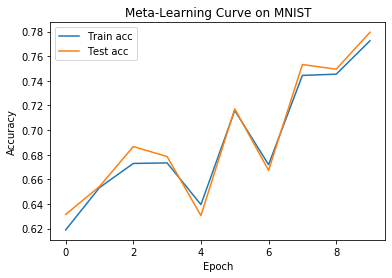

In [6]:
# Plot learning curves of meta-learning
plt.plot(np.reshape(meta_train_acc, -1), label='Train acc')
plt.plot(np.reshape(meta_test_acc, -1), label='Test acc')
plt.title('Meta-Learning Curve on MNIST')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Now try plasticity-based training using the learned output rule:

Train on 0  examples.
Acc of class 0 :0.8560
Acc of class 1 :0.0000
Acc of class 2 :0.0000
Acc of class 3 :0.0000
Acc of class 4 :0.0000
Acc of class 5 :0.0000
Acc of class 6 :0.0000
Acc of class 7 :0.0000
Acc of class 8 :0.0000
Acc of class 9 :0.6783
Train Accuracy: 0.1517
Acc of class 0 :0.8490
Acc of class 1 :0.0000
Acc of class 2 :0.0000
Acc of class 3 :0.0000
Acc of class 4 :0.0000
Acc of class 5 :0.0000
Acc of class 6 :0.0000
Acc of class 7 :0.0000
Acc of class 8 :0.0000
Acc of class 9 :0.7166
Test Accuracy: 0.1555
Train on 500  examples.
Acc of class 0 :0.9607
Acc of class 1 :0.9742
Acc of class 2 :0.7979
Acc of class 3 :0.8216
Acc of class 4 :0.8304
Acc of class 5 :0.5942
Acc of class 6 :0.9066
Acc of class 7 :0.8892
Acc of class 8 :0.6428
Acc of class 9 :0.7532
Train Accuracy: 0.8216
Acc of class 0 :0.9755
Acc of class 1 :0.9771
Acc of class 2 :0.7955
Acc of class 3 :0.8257
Acc of class 4 :0.8299
Acc of class 5 :0.6043
Acc of class 6 :0.8862
Acc of class 7 :0.8716
Acc of class

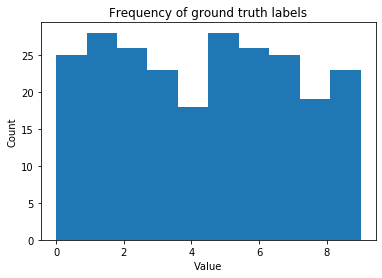

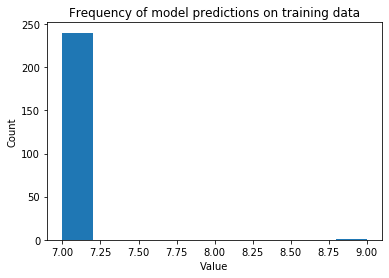

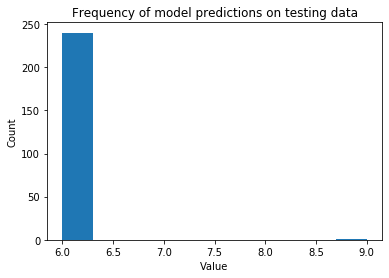

In [37]:
# NOTE: The output weights will be automatically reset during the first sample within train_given_rule()
X_train_2 = np.repeat(X_train, 2, axis=0)
y_train_2 = np.repeat(y_train, 2, axis=0)
plas_train_acc, plas_test_acc, plas_other_stats = train.train_given_rule(X_train_2, y_train_2, local_brain, verbose=True, X_test=X_test, y_test=y_test)

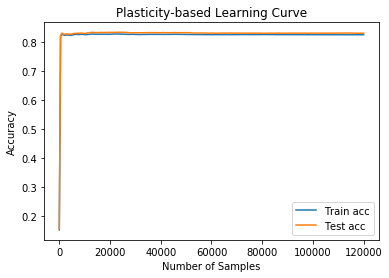

In [38]:
# Plot the learning curves of plasticity-based learning
tot_samples = (len(plas_train_acc) - 1) * 500
plas_samples = np.linspace(0, tot_samples, len(plas_train_acc))

plt.plot(plas_samples, plas_train_acc, label='Train acc')
plt.plot(plas_samples, plas_test_acc, label='Test acc')
plt.title('Plasticity-based Learning Curve')
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

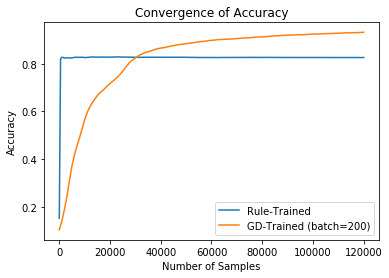

In [39]:
# Compare the learning curves
plt.plot(plas_samples, plas_train_acc, label='Rule-Trained')
plt.plot(gd_samples, gd_accuracies, label='GD-Trained (batch=200)')
plt.title('Convergence of Accuracy')
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

---